# DSCI 100 Project

## Introduction


### Background

According to the World Health Organization (WHO), breast cancer is one of the most common variants of cancer worldwide and the most frequently diagnosed cancer in women. Our project explores a dataset involving the physical characteristics of benign (non-cancerous) and malignant (cancerous) tumors. We will use data classification techniques to investigate these features and provide valuable insights that may guide future research into this issue and increase the speed and accuracy of cancer detection in patients.


### Predictive Question

Are we able to predict the diagnosis of a tumor, such as whether it is benign or malignant, based on its physical characteristics? If so, is it possible to make predictions with a confidence level of 95+% (standard cutoff of p < 0.05)?

### Data

To clarify the content of our dataset, each row/observation represents a tumor that is either benign or malignant and each column/variable represents an attribute of a tumor. The entire dataset includes 33 columns, however, we are only concerned with the diagnosis, as categorical data for classification, and “mean” variables as measurements for prediction. This is because other variables include data about the same features that were used to calculate the mean columns and will not be necessary to include for our model; this leaves us with 11 variables.

The attributes of each tumor are represented as follows:

- **diagnosis** (M = malignant, B = benign)
- **radius** (mean of distances from center to points on the perimeter)
- **texture** (standard deviation of gray-scale values)
- **perimeter**
- **area**
- **smoothness** (local variation in radius lengths)
- **compactness** (perimeter^2 / area - 1.0)
- **concavity** (severity of concave portions of the contour)
- **concave points** (number of concave portions of the contour)
- **symmetry**
- **fractal dimension** ("coastline approximation" - 1)

The dataset we are using is downloaded from Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


## Methods and Results


### Importing Packages

In [1]:
install.packages("tidymodels")
install.packages("GGally")
install.packages("kknn")

options(repr.matrix.max.rows = 6) # limit dataframe row display

library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(broom)
library(knitr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────

### Loading Data

In [2]:
# load in the entire 33 column dataset to prepare for wrangling
bcancer <- read_csv('data/bcancer_data.csv')

bcancer

New names:
• `` -> `...33`
Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 568 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...
lgl  (1): ...33

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,...33
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
842302,M,17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.8,1956,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.5,1709,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
926682,M,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,⋯,38.25,155.0,1731,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NA
926954,M,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,⋯,34.12,126.7,1124,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,NA
927241,M,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,⋯,39.42,184.6,1821,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,NA


### Wrangling Data

##### Transform data into a quantitative format

In [3]:
# select relevant columns, and wrangle data into a more workable representation
bcancer_means <- bcancer |>
    select(-id) |>
    select(diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, 'concave points_mean', symmetry_mean, fractal_dimension_mean) |>
    relocate(diagnosis, .after = fractal_dimension_mean) |>
    mutate(diagnosis = as_factor(as.numeric(as_factor(diagnosis)) - 1))
# above, subtracting 1 from the as.numeric since factor index starts at 1,
# but we would like it to start at 0

# rename one weird column with space in it
names(bcancer_means)[names(bcancer_means) == 'concave points_mean'] <- "concave_points_mean"
  
bcancer_means

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,0.05533,0
16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,0.05648,0
20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,0.2397,0.07016,0


##### K-Nearest Neighbour Train-Test-Split

In [4]:
# different seed than the seed used for training, 
# since this is used for testing as well
set.seed(2020)

# create train-test-split in order to verify that the model works
bcancer_split <- initial_split(bcancer_means, prop = 0.75, strata = diagnosis)  
bcancer_train <- training(bcancer_split)
bcancer_test  <- testing(bcancer_split)

bcancer_train

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,1
14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,1
11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,1


### Summary

**Information about the dataset that is relevant to exploratory analysis**

This dataset consists of values representing physical attributes of breast cancer tumors. The original dataset consisted of 33 columns divided into three groups representing feature means, standard error, and worst/largest (mean of 3 largest values). In this analysis, we are interested only in the mean columns, so those were isolated during the data wrangling process. The specific features of interest are `radius_mean`, `texture_mean`, `area_mean`, `smoothness_mean`, `compactness_mean`, `concavity_mean`, `concave_points_mean`, `symmetry_mean`, and `fractal_dimension_mean`. The data in these features is **not scaled**, implying that scaling and centering must be done during the recipe step of the exploratory analysis.

#### Training analysis for optimal k-value

In [5]:
set.seed(2019)

bcancer_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |> 
    set_mode("classification")

In [6]:
set.seed(2019)

# scale and center features, as the data has yet to be scaled
bcancer_recipe <- recipe(diagnosis ~ ., data = bcancer_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

bcancer_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor         10

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [7]:
set.seed(2019)

bcancer_vfold <- vfold_cv(bcancer_train, v = 5, strata = diagnosis)

##### Determine model accuracies through cross-validation

In [8]:
set.seed(2019)

bcancer_k_vals <- tibble(neighbors = seq(from = 1, to = 25, by = 2))

bcancer_results <- workflow() |>
    add_recipe(bcancer_recipe) |>
    add_model(bcancer_tune) |>
    tune_grid(resamples = bcancer_vfold, grid = bcancer_k_vals) |>
    collect_metrics()

bcancer_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9038551,5,0.01713854,Preprocessor1_Model01
1,roc_auc,binary,0.8979163,5,0.01666468,Preprocessor1_Model01
3,accuracy,binary,0.9226793,5,0.01676831,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
23,roc_auc,binary,0.9798956,5,0.006422383,Preprocessor1_Model12
25,accuracy,binary,0.9296287,5,0.014795578,Preprocessor1_Model13
25,roc_auc,binary,0.9796098,5,0.006426957,Preprocessor1_Model13


In [9]:
bcancer_accuracies <- bcancer_results |>
    filter(.metric == "accuracy")

bcancer_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9038551,5,0.01713854,Preprocessor1_Model01
3,accuracy,binary,0.9226793,5,0.01676831,Preprocessor1_Model02
5,accuracy,binary,0.9203264,5,0.01445503,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
21,accuracy,binary,0.9297388,5,0.01273843,Preprocessor1_Model11
23,accuracy,binary,0.9320370,5,0.01708004,Preprocessor1_Model12
25,accuracy,binary,0.9296287,5,0.01479558,Preprocessor1_Model13


##### Determine the highest accuracy, and take it's corresponding k-value

In [10]:
bcancer_optimal_k <- bcancer_accuracies |>
    arrange(desc(mean)) |>
    select(neighbors) |>
    slice(1) |>
    pull()

bcancer_optimal_k

[1] 19

#### Testing analysis with optimal k-value

##### Create a k-nearest neighbours model with the optimal value for k (as shown by the accuracy_vs_k plot in the Visualization section)

In [11]:
set.seed(2020)

# run tests with optimal k-value
bcancer_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = bcancer_optimal_k) |>
    set_engine("kknn") |> 
    set_mode("classification")

bcancer_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = bcancer_optimal_k
  weight_func = rectangular

Computational engine: kknn 


In [12]:
set.seed(2020)

bcancer_fit <- workflow() |>
    add_recipe(bcancer_recipe) |>
    add_model(bcancer_spec) |>
    fit(data = bcancer_train) # fit on training data to use on test data

bcancer_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.07042254
Best kernel: rectangular
Best k: 19

##### K-nearest neighbours predictions and summary statistics

In [13]:
set.seed(2020)

bcancer_predictions <- predict(bcancer_fit, bcancer_test) |>
    bind_cols(bcancer_test)

bcancer_predictions

.pred_class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,0
0,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,0
0,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,1
1,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,1
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0


In [14]:
set.seed(2020)

bcancer_metrics <- bcancer_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class)

bcancer_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9718310
kap,binary,0.9393292


In [15]:
set.seed(2020)

bcancer_test_accuracy <- bcancer_metrics |>
    select(.estimate) |>
    slice(1) |>
    pull()

bcancer_test_accuracy

[1] 0.971831

In [32]:
set.seed(2020)

bcancer_classifications <- c("Malignant", "Benign")

bcancer_conf_mat <- bcancer_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)

rownames(bcancer_conf_mat$table) <- bcancer_classifications
colnames(bcancer_conf_mat$table) <- bcancer_classifications

bcancer_conf_mat

           Truth
Prediction  Malignant Benign
  Malignant        50      1
  Benign            3     88

### Visualization

##### Fig. 1 - Pair-plot for `bcancer_means` demonstrates diagnosis clusters


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



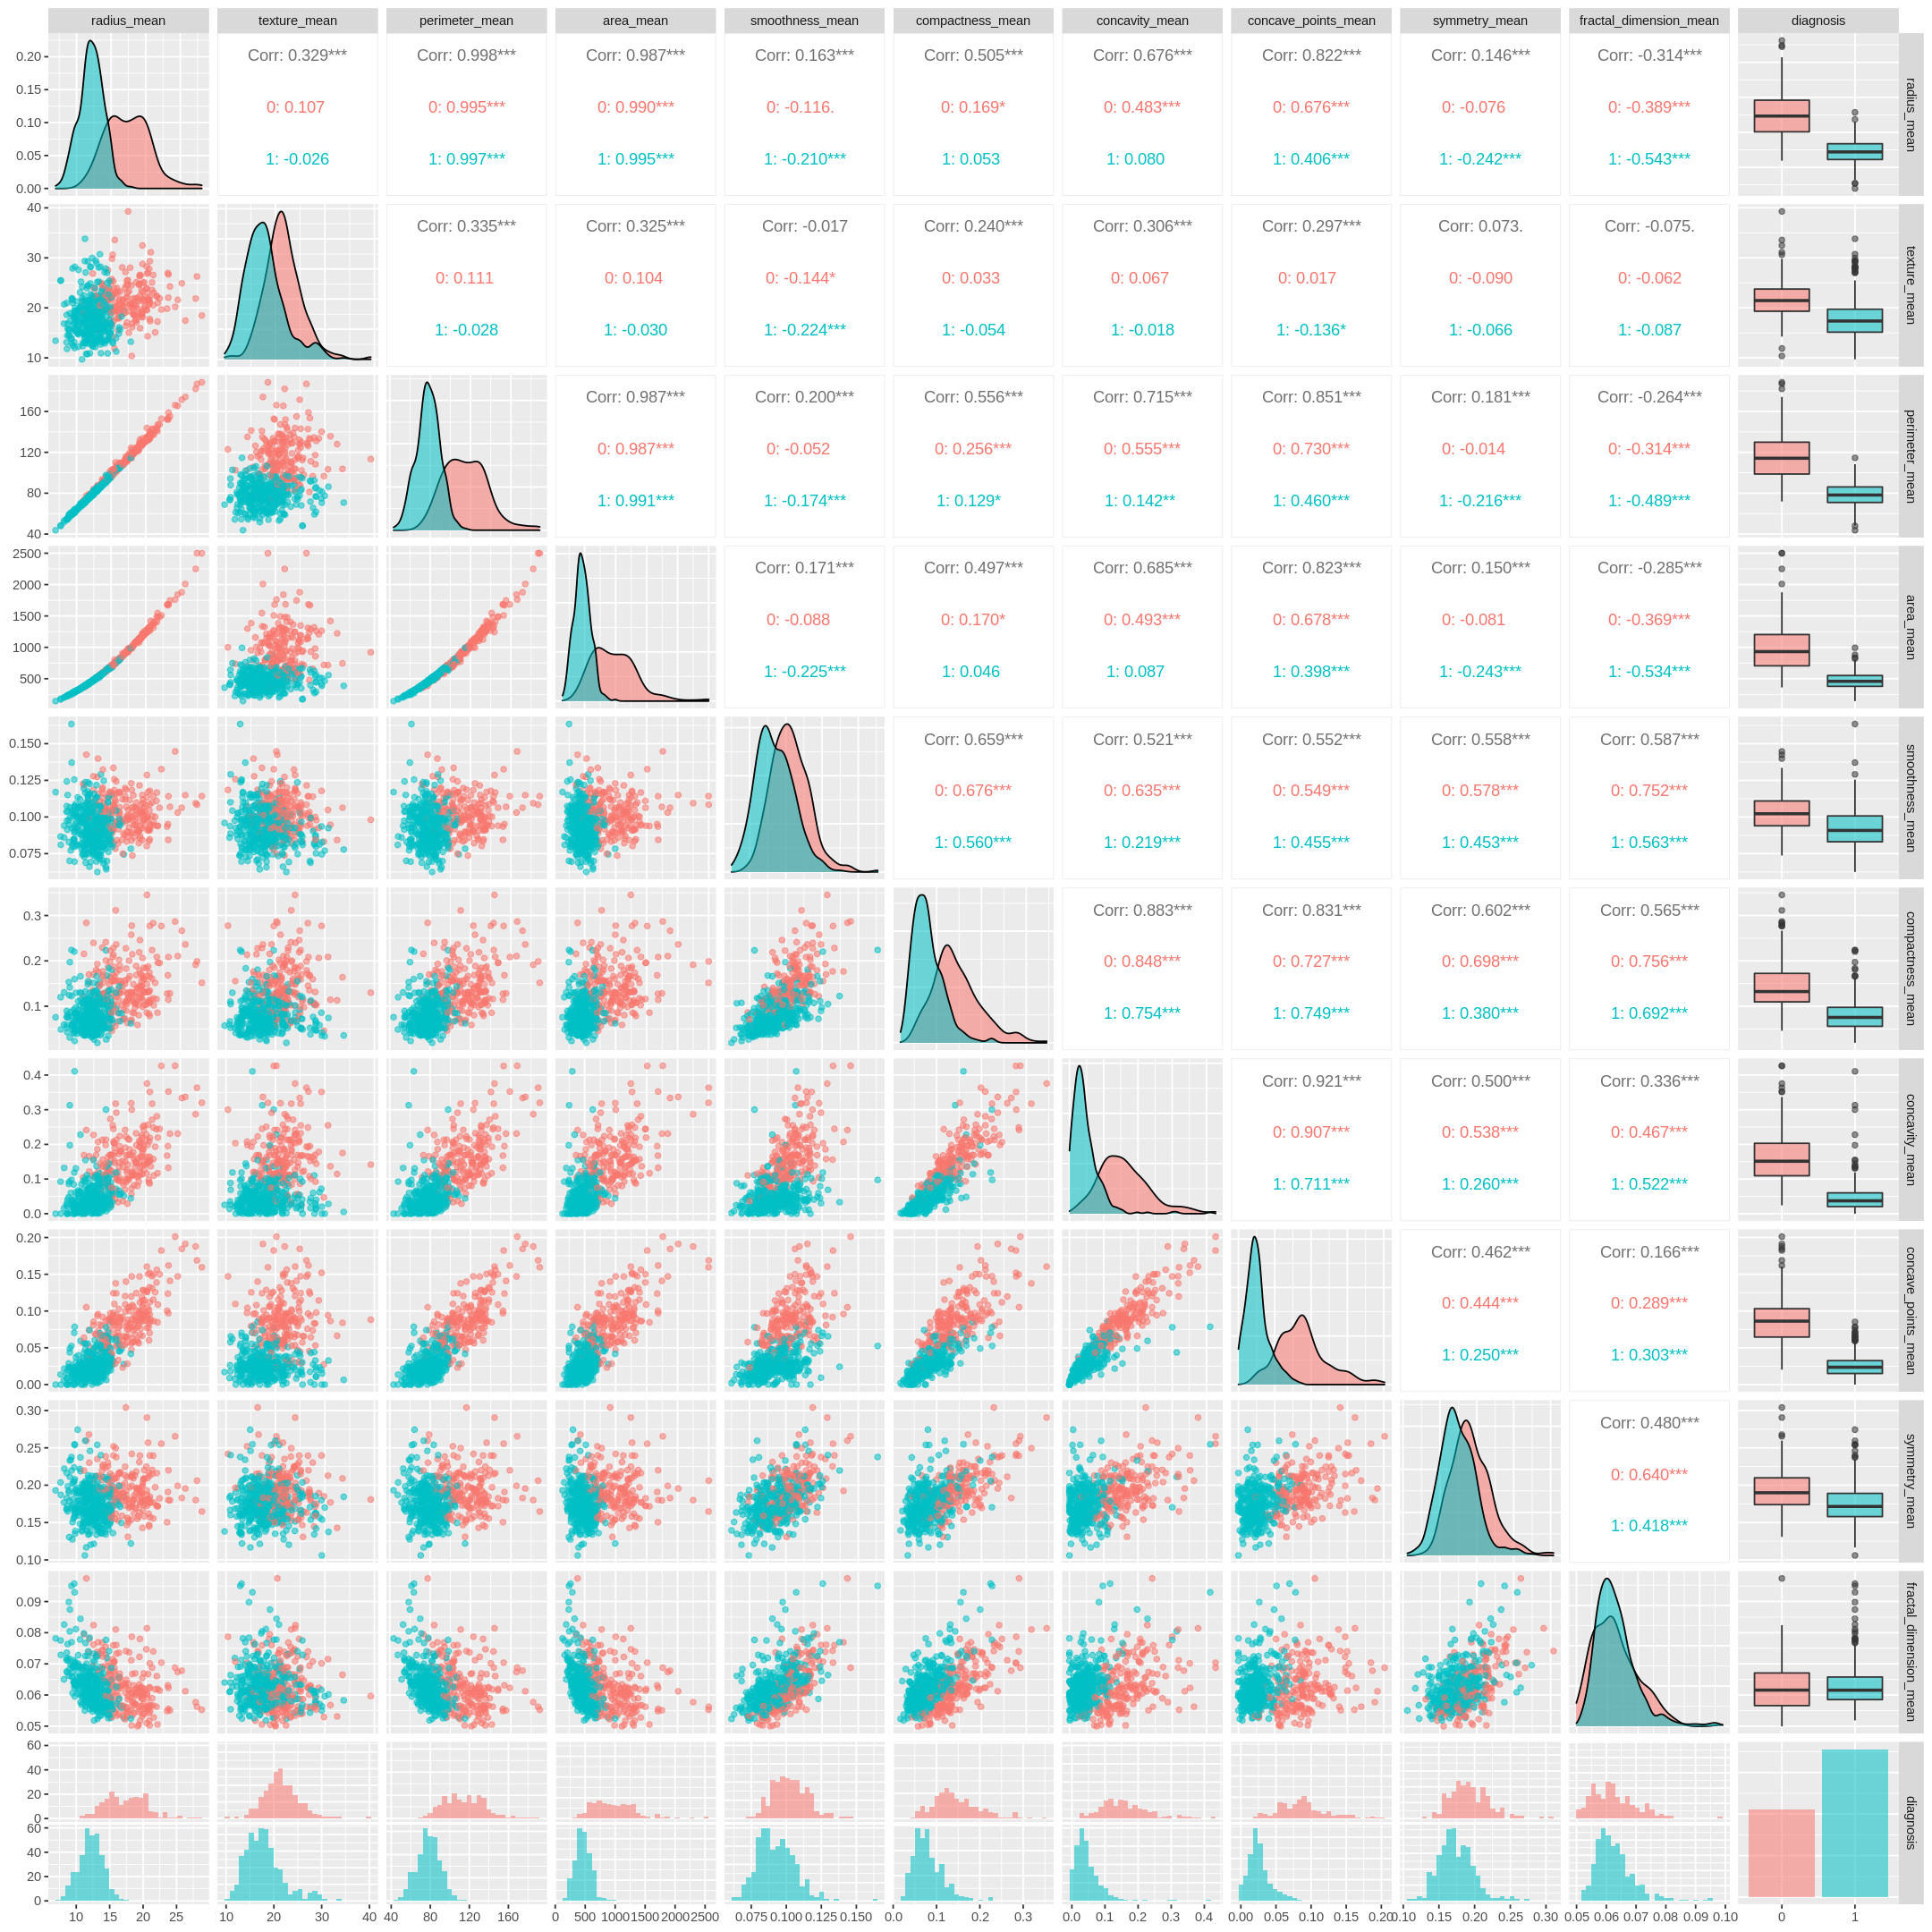

In [33]:
options(repr.plot.height = 18, repr.plot.width = 18)

bcancer_temp_diagnosis <- bcancer_means['diagnosis']

# bin-width for histograms defaults to 30, not necessarily relevant as we are paying attention to the scatter plot diagnoses
bcancer_pairs_plot <- bcancer_means |>
    ggpairs(mapping = aes(color = diagnosis, alpha = 0.4))

bcancer_pairs_plot

##### Fig. 2 - K-nearest neighbours optimal k-value plot (based on training cross-validation results)

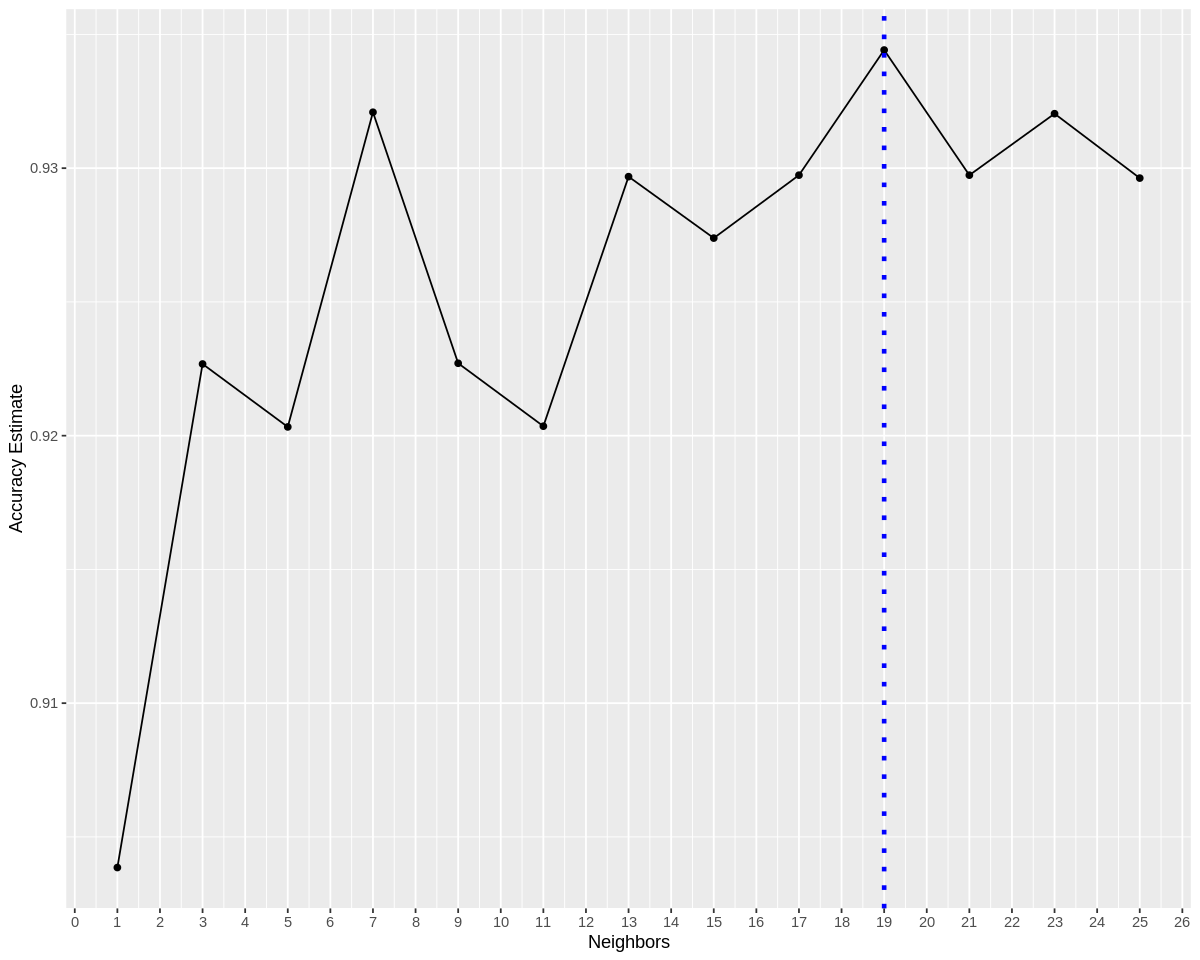

In [34]:
options(repr.plot.height = 8, repr.plot.width = 10)

accuracy_versus_k <- bcancer_accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate") +
        geom_vline(xintercept = bcancer_optimal_k, linetype = "dotted", color = "blue", size = 1.3) +
        scale_x_continuous(breaks = seq(0, 100, by = 1)) # scale x axis, max set to 100 since it auto decreases for lower values of k

accuracy_versus_k

##### Fig. 3 - Mosaic plot representation of test classifications and true classes

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



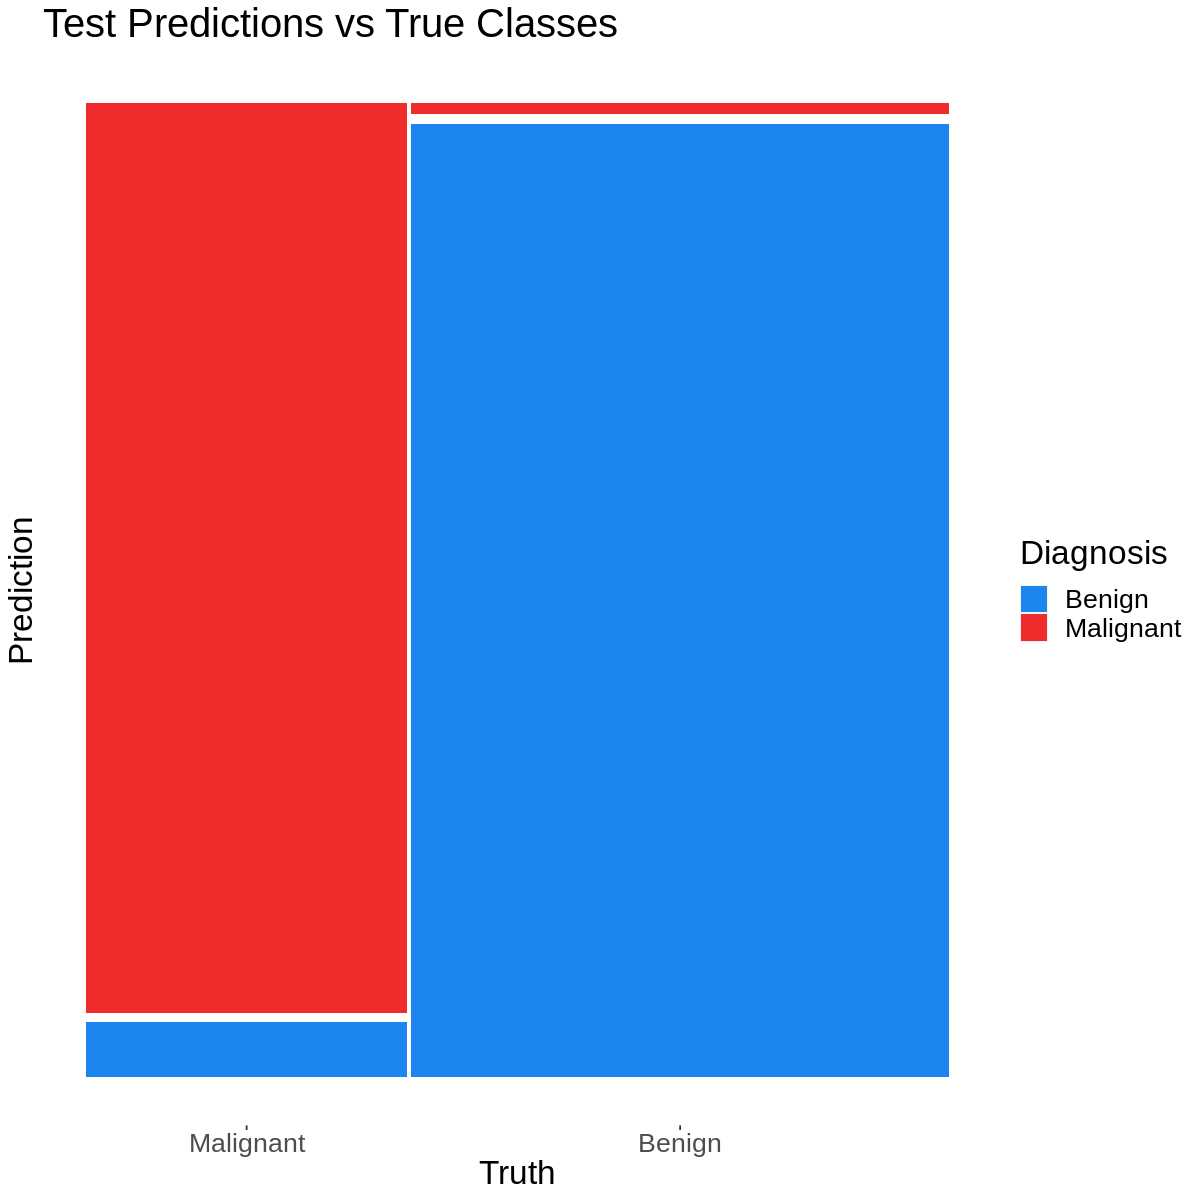

In [36]:
options(repr.plot.height = 10, repr.plot.width = 10)

bcancer_conf_mat_mosaic_plot <- bcancer_conf_mat |>
    autoplot(type = "mosaic") +
        aes(fill = rep(colnames(bcancer_conf_mat$table), ncol(bcancer_conf_mat$table))) + 
        labs(title = "Test Predictions vs True Classes", fill = "Predicted") +
        # *bcancer_classifications is defined in the cell where bcancer_conf_mat was created
        scale_fill_manual(name = "Diagnosis", values = c("dodgerblue2", "firebrick2")) +
        # remove y-axis; legend represents y classification
        scale_y_continuous(breaks = NULL) +
        theme(text = element_text(size = 20))

bcancer_conf_mat_mosaic_plot

##### Fig. 4 - Analysis visualization in the form of the test data confirmation matrix

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



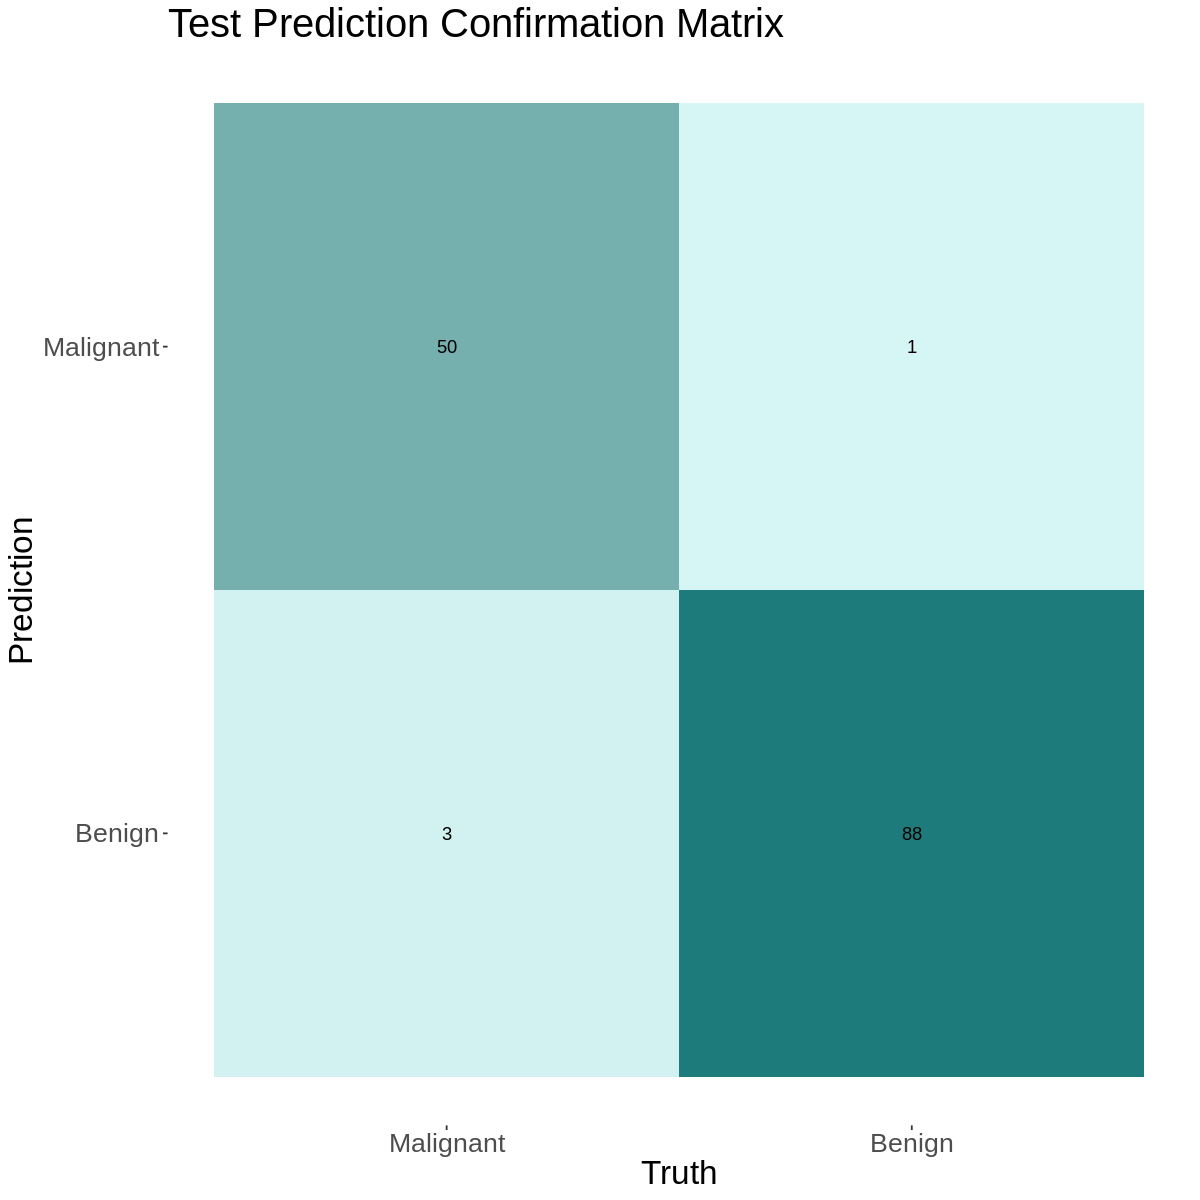

In [25]:
options(repr.plot.height = 10, repr.plot.width = 10)

bcancer_conf_mat_plot <- bcancer_conf_mat |>
    autoplot(type = "heatmap") +
        scale_fill_gradient(low="#d6f5f5", high = "#1e7b7b") +
        labs(title = "Test Prediction Confirmation Matrix") +
        theme(text = element_text(size = 20))
  
bcancer_conf_mat_plot

### Results

As shown above in Fig 4., there are three values predicted as 0 that are actually 1, and 5 values predicted as 1 that are actually 0. Since **0** represents **malignant** and **1** represents **benign**, this model predicted that **three** tumors were benign, when they were actually malignant. The ratio of incorrect benign predictions to incorrect malignant predictions is visible in the mosaic plot represented by Fig. 3. With regards to Fig. 2 (the `accuracy_versus_k` plot), the value of k with the highest accuracy can be determined to be `19`. This specific classifier with `k=19` found a confidence accuracy of ~97% over a test set with a sample count of `n=142`. Given the accuracy, it approaches a p-value of ~0.03, which is below a p-value of 0.05, and therefore demonstrates a confidence interval above 95%.

### Methods

The first step taken was to ensure that all relevant libraries are included in this notebook. Once all the dependencies are worked out, the dataset is loaded into a dataframe by the name of `bcancer_means` using `tidyverse/readr`'s `read_csv` function. This analysis involves columns strictly representing the mean values; not all columns are necessary, implying that the columns of interest (anything ending in `_mean`, along with classification variable) must be selected. Once the proper columns have been selected, the classification variable's column is relocated to be the last column in the dataframe for easy reading; furthermore, the data type is converted into a numeric factor with levels of 0 and 1. The naming conventions used in the columns is snake-case, however there is one column that has a space instead of an underscore. To rectify this, the column must be renamed from `'concave points_mean'` to `'concave_points_mean'`. Once all the data wrangling is finished, `bcancer_means` is split into a training set (`bcancer_train`) and a testing set (`bcancer_test`) to prepare for classification.

The first step in the classification process is to create a specification to determine the optimal value to be used for k; this is done through creating a knn specification with `tune()` specified as the k-value. The next step is to prepare a recipe to use for the classification; this is where the relevant features of `bcancer_train` are selected, scaled, and centered (all features are relevant in this case). In order to determine the correct value for k on average, cross-validation is used to examine the behaviour of k when used with randomly chosen datasets. As cross-validation can take a decent amount of time to perform for larger datasets, only five folds were selected. Once the cross-validation object is created, a workflow must be used to determine optimal k-values along with respective accuracies. The k-values in question span *odd* numbers from 1 to 11, inclusive. Once the workflow is created, it is tuned for k using the `tune_grid()` function. As `tune_grid()` returns a resampling set, information from tuning can be extracted using the `collect_metrics()` function. As the tuning accuracy (not roc_auc) samples represent the optimal value of k, they are filtered into a new dataframe called `bcancer_accuracies`. The value of k with the highest accuracy (in this case, `19`) is determined to be the optimal value, and it is used in the creation of a new knn specification that will be used on the `bcancer_test` dataframe. A new workflow, `bcancer_fit`, is created with the new specification and the old recipe and fit using `bcancer_test`. No cross-validation is performed on the testing data. Predictions are then performed utilizing `predict()` with `bcancer_fit` and `bcancer_test`. Once test predictions have been made, the accuracy and confusion matrix of the model are determined.

As all the model training and testing has been performed, a pair plot visualization can be used to demonstrate the relationships between the features in the dataset. As denoted by the colour, the classifications of data points can visibly be seen congregating towards specific clusters of their same class. This signifies that predictions could potentially be made utilizing just two of the features as opposed to all ten, though they may be worse in terms of accuracy (Fig. 1). The optimal-k-value can further be visualized by plotting the `bcancer_accuracies` dataframe, where it is denoted by a dotted vertical line (Fig. 2). Test predictions are visualized through a heatmap of the test confirmation matrix determined earlier (Fig. 4), along with a mosaic plot representing the ratio of correct predictions to incorrect predictions (Fig. 3).

## Discussion

### Findings

**Summary of findings**

The data analysis project aimed to predict the diagnosis of a tumor as benign or malignant based on its physical characteristics and achieve a confidence level of 95+% (p < 0.05). The dataset included 33 columns, but the study focused on 11 variables, namely the diagnosis and mean values of physical characteristics. The k-Nearest Neighbors (kNN) classification algorithm was employed, and the optimal k-value was determined through cross-validation. 

The results showed that the classifier with k=19 achieved an accuracy of approximately 97% on the test set with 142 samples. The p-value of this classifier was found to be ~0.03, which is below the standard cutoff of 0.05, indicating a confidence interval above 95%. This means the model was able to predict tumor diagnosis with high accuracy based on the selected physical characteristics.

The findings indicate that the physical characteristics of tumors can be effectively used for classification and may help improve the speed and accuracy of cancer detection. The high accuracy and low p-value suggest that the model is statistically significant and may be useful for guiding future research. However, it is essential to validate these findings with more extensive datasets and explore the possibility of using other algorithms to further improve the accuracy and reliability of the predictions. Our predictive question aimed to determine if tumor diagnoses could be accurately predicted based on their physical characteristics, with a confidence level of 95+% (p < 0.05). The classifier's performance, with an accuracy of approximately 97% and a p-value of ~0.03, demonstrated that we were successful in addressing the predictive question. This accomplishment highlights the potential of our model for supporting clinical decision-making and guiding future research in the field of cancer detection and classification.

It’s also significant to note that the error in our model, while small, occurred three times as much for incorrect predictions of benign when the diagnosis was actually malignant (see the confusion matrix, fig. 4). This is especially problematic because it is far more damaging in real-world application to falsely diagnose a patient who has a cancerous tumor than it is to falsely diagnose a patient who is not at risk of cancer. It is clear that an improved version of our model would take extra steps to improve accuracy for this category of classification; specific ideas for a stronger model are detailed further below. 

**Is this what was expected?**


The high accuracy of approximately 97% and the p-value of ~0.03 were somewhat expected, given that previous studies have also demonstrated the potential of using physical characteristics of tumors to distinguish between benign and malignant cases. The k-Nearest Neighbors (kNN) classification algorithm is known for its effectiveness in such classification tasks, which contributed to our expectations of achieving a high level of accuracy and a confidence interval above 95%.

The optimal k-value of 19, determined through cross-validation, provided a good balance between the bias-variance tradeoff, ensuring a robust model that generalizes well to new data. The pair plot visualization further supported our expectations, as it showed data points of the same class clustering together based on the selected features.

Despite these positive findings, we are aware that there is always room for improvement. The model could potentially be enhanced by validating it on more extensive datasets, exploring alternative algorithms, or incorporating additional relevant features, such as other characteristics of tumors or demographic and lifestyle attributes of the patient. However, the current results are promising and provide valuable insights that can guide future research in cancer detection and classification.


### Significance

**Impact**

Such findings could improve early detection and diagnosis in healthcare and research. Identifying the most significant features in predicting malignancy could lead to the development of more accurate and efficient screening tools, which may increase the likelihood of detecting cancer at an earlier stage, when treatment is more effective. Early detection and diagnosis are critical components in the successful treatment of breast cancer, as they provide the best chance of effective intervention before the cancer progresses to advanced stages. By identifying the most significant features in predicting malignancy, this study could potentially contribute to improving early detection and diagnosis in the following ways:

- Enhanced screening tools: By pinpointing the key tumor attributes that indicate malignancy, researchers can develop or refine existing screening tools to better identify these features, such as optimizing image processing techniques, enhancing the sensitivity of equipment, or creating new imaging modalities that are designed to capture specific attributes.
- Risk stratification: Understanding the most significant features in predicting malignancy can help healthcare professionals more accurately assess an individual’s risk of developing breast cancer. By incorporating these features into risk assessment models, clinicians can identify patients who may require more frequent or intensive screening, as well as provide personalized recommendations for preventative measures.
- Machine learning-assisted diagnostics: The insights gained from this study can be used to develop or improve machine learning algorithms that analyze medical images for the presence of identified features, increasing the accuracy and efficiency of the diagnostic process, reducing false positives and negatives, minimizing unnecessary biopsies and reducing the anxiety associated with misdiagnoses. 


**Future Questions**

The results of this study lead to many questions that could be addressed in future studies. One question that immediately comes to mind is whether the findings from the classification of breast cancer tumors could help predict the malignancy of other non-breast tumors. This question arises because certain characteristics might be universal indicators of malignancy across various types of cancer. If these common features exist, the insights gained from analyzing breast cancer tumors could potentially be applied to enhance early detection and diagnosis strategies for other cancers. 

Exploring this would involve investigating similarities and differences between breast cancer tumors and non-breast tumors in terms of their attributes and underlying biological mechanisms. By comparing the most significant features identified in the breast cancer study with those observed in other cancer types, researchers can determine whether these characteristics are general predictors of malignancy or if they are specific to breast cancer. 

This comparison could also reveal new, previously overlooked features for predicting malignancy in non-breast tumors. Furthermore, if a shared set of predictive features is identified, it could have significant implications for the development of more comprehensive and effective cancer screening tools. Such tools could improve early detection and diagnostic accuracy for multiple types of cancer, leading to better patient outcomes and streamline resource allocation in healthcare.

Another question for future research is whether the model could be improved by incorporating additional features, such as patient medical history or genetic information. The incorporation of patient medical history could potentially strengthen the model by considering factors that may exacerbate breast cancer. For example, family history of breast cancer, history of benign breast disease, and hormonal factors might be relevant in determining the likelihood of a tumor being benign or malignant. By including these variables in the model, we might be able to improve its accuracy and predictive power. 

Similarly, genetic information could also play a vital role in enhancing the model's performance. Certain genetic mutations, such as those in the BRCA1 and BRCA2 genes, are known to increase the risk of developing breast cancer. By incorporating this genetic data into the model, we could identify patterns or relationships between specific genetic variations and the physical characteristics of tumors. This could lead to a more accurate and comprehensive understanding of the factors influencing tumor diagnosis, as well as the development of personalized prevention and treatment strategies.



## References

- World Health Organization. (26 March 2021). *Breast cancer*. https://www.who.int/news-room/fact-sheets/detail/breast-cancer

- American Cancer Society. (16 December 2021). *Breast Cancer Risk Factors You Cannot Change*.
https://www.cancer.org/cancer/breast-cancer/risk-and-prevention/breast-cancer-risk-factors-you-cannot-change.html


- Cui, Y., Li, Y., Xing, D., Bai, T., Dong, J., & Zhu, J. (2021). Improving the Prediction of Benign or Malignant Breast Masses Using a Combination of Image Biomarkers and Clinical Parameters. *Frontiers in oncology, 11*, 629321. https://doi.org/10.3389/fonc.2021.629321

- Dewangan, K. K., Dewangan, D. K., Sahu, S. P., & Janghel, R. (2022). Breast cancer diagnosis in an early stage using novel deep learning with hybrid optimization technique. *Multimedia tools and applications, 81*(10), 13935–13960. https://doi.org/10.1007/s11042-022-12385-2

- Louro J, Román M, Posso M, Vázquez I, Saladié F, et al. (2021) Developing and validating an individualized breast cancer risk prediction model for women attending breast cancer screening. *PLOS ONE 16*(3). https://doi.org/10.1371/journal.pone.0248930

- Chaurasia V, Pal S, Tiwari B (2018). Prediction of benign and malignant breast cancer using data mining techniques. *Journal of Algorithms & Computational Technology, 12*(2), 119-126. https://doi.org/10.1177/1748301818756225

## Dataset
- Wolberg, Dr. William, Street, W. Nick, Mangasarian, Olvi L. (1995). Breast Cancer Wisconsin (Diagnostic) Data Set.  https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data